In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import sys
from mpl_styles import analytic
sys.path.insert(0, '/home/astrosun/jtlaune/athena/vis/python')
import athena_read
%matplotlib inline

6581.1475


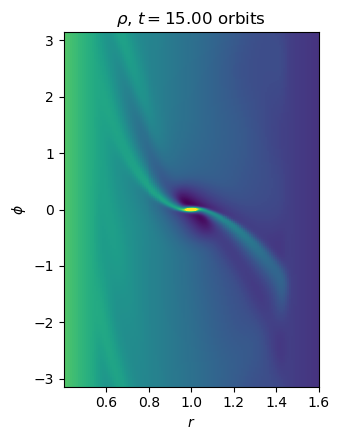

In [7]:
#os.chdir("/home/astrosun/jtlaune/athena/work3/")
#os.chdir("/home/astrosun/jtlaune/athena/work/soft0.01_q1e-5_h0.05/")
os.chdir("/home/astrosun/jtlaune/athena/work/")
data0 = athena_read.athdf("ppd_cyl.out1.00000.athdf")
rho0 = data0["dens"][0,:,:]
vr0 = data0["mom1"][0,::1,::1]/data0["dens"][0,::1,::1]
vth0 = data0["mom2"][0,::1,::1]/data0["dens"][0,::1,::1]

data = athena_read.athdf("ppd_cyl.out1.00015.athdf")
rho = data["dens"][0,:,:]
vr = data["mom1"][0,::1,::1]/data["dens"][0,::1,::1]
vth = data["mom2"][0,::1,::1]/data["dens"][0,::1,::1]

coordsr, coordsth = np.meshgrid(data["x1v"], data["x2v"])
coordsx = coordsr*np.cos(coordsth)
coordsy = coordsr*np.sin(coordsth)


fig, ax = plt.subplots(figsize=(3.5,4.5))
ax.set(title=r"$\rho$, $t=$"+f"{data['Time']/(2*np.pi):0.2f} orbits")
quant = rho
print(np.max(np.abs(rho/rho0-1)))
cs1 = ax.pcolormesh(coordsr, coordsth, 
                    quant,shading="auto", norm=colors.LogNorm(vmax=10))

#ax.add_patch(plt.Circle((1,0), (1e-5/3)**(1./3), color='k', fill=False,lw=0.1))
#ax.add_patch(plt.Circle((1,0), 0.005, color='k', fill=False,lw=0.1))

#def format_coord(x, y):
#    col = np.where((data["x1f"])>x)[0][0]-1
#    row = np.where((data["x2f"])>y)[0][0]-1
#    xarr = data["x1v"] - np.diff(data["x1v"]).mean()/2
#    yarr = data["x2v"] - np.diff(data["x2v"]).mean()/2
#
#    return f'x={x:1.4f}, y={y:1.4f}, z={quant[row,col]:.3e} [{row},{col}]'
#    
#ax.format_coord = format_coord

#fig.colorbar(cs1)
ax.set_xlabel(r"$r$")
ax.set_ylabel(r"$\phi$")

#fig.colorbar(cs2)
#ax.set_title("integrator=vl2 & xorder=2")
fig.tight_layout()
fig.savefig("prelimsim.png",dpi=90)

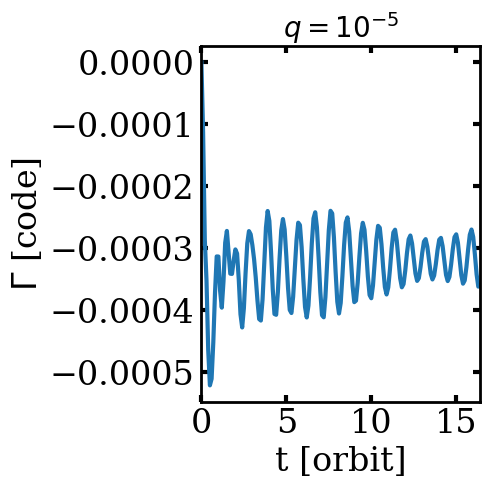

In [17]:
@mpl.rc_context(analytic)
def plot():
    os.chdir("/home/astrosun/jtlaune/athena/work/")
    hst = np.loadtxt("ppd_cyl.hst")
    t=hst[:,0]/6.28
    fig, ax = plt.subplots(figsize=(5,5))
    Fsgrav_x=hst[:,9]
    Fsgrav_y=hst[:,10]
    ax.plot(t, -Fsgrav_y)
    ax.set_xlim((0,t[-1]))
    #ax.set_ylim((-3e-7,0.))
    ax.set_xlabel(r"t [orbit]")
    ax.set_ylabel(r"$\Gamma$ [code]")
    ax.set_title("$q=10^{-5}$")
    #ax.axhline(y=-5.2e-6, c="k", ls="--")
    #ax.text(45,-2.3e-8,"$\Gamma_L\propto (q^2/h^2)\Sigma_pr_p^4\Omega_p^2$",
    #        fontsize=20, verticalalignment="bottom")
    fig.tight_layout()
plot()

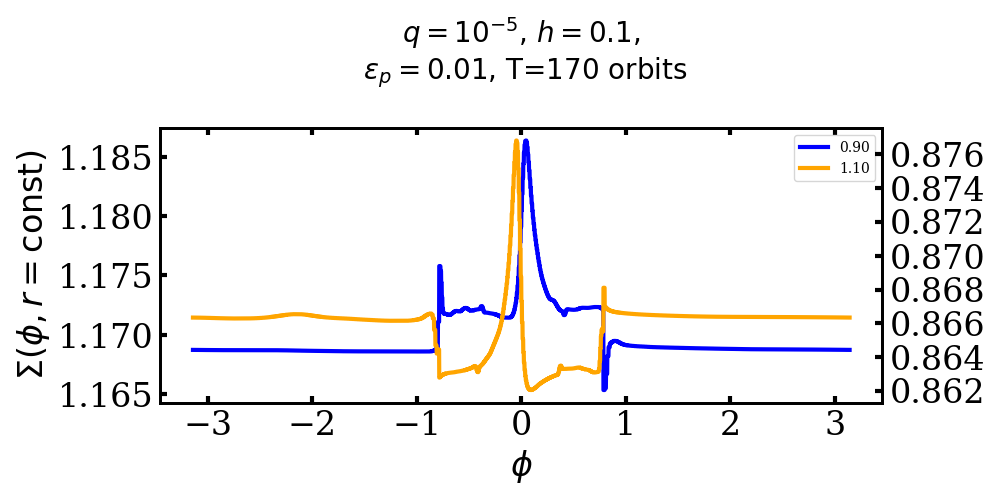

In [96]:
@mpl.rc_context(analytic)
def plot():
    os.chdir("/home/astrosun/jtlaune/athena/work/soft0.01_q1e-5_h0.10/")
    data0 = athena_read.athdf("ppd_cyl.out1.00000.athdf")
    rho0 = data0["dens"][0,:,:]
    vr0 = data0["mom1"][0,::1,::1]/data0["dens"][0,::1,::1]
    vth0 = data0["mom2"][0,::1,::1]/data0["dens"][0,::1,::1]
    
    data = athena_read.athdf("ppd_cyl.out1.00017.athdf")
    rho = data["dens"][0,:,:]
    vr = data["mom1"][0,::1,::1]/data["dens"][0,::1,::1]
    vth = data["mom2"][0,::1,::1]/data["dens"][0,::1,::1]
    
    coordsr, coordsth = np.meshgrid(data["x1v"], data["x2v"])
    coordsx = coordsr*np.cos(coordsth)
    coordsy = coordsr*np.sin(coordsth)
    
    fig, ax = plt.subplots(figsize=(10,5))
    r0 = 0.9
    ind1  = np.where(coordsr[0,:]>r0)[0][0]
    r01 = coordsr[0,ind1]
    line1,=ax.plot(coordsth[:,ind1], rho[:,ind1],c="blue")
    
    r0 = 1.1
    ind2 = np.where(coordsr[0,:]>r0)[0][0]
    r02 = coordsr[0,ind2]
    ax2 = ax.twinx()
    line2,=ax2.plot(coordsth[:,ind2], rho[:,ind2],c="orange")
        
    ax.legend([line1,line2],[f"{r01:0.2f}", f"{r02:0.2f}"])
    ax.set_xlabel("$\phi$")
    ax.set_ylabel("$\Sigma(\phi, r=\mathrm{const})$")
    ax.set_title("$q=10^{-5}$, $h=0.1$,\n $\epsilon_p=0.01$, T=170 orbits", pad=35)
    fig.tight_layout()
    
plot()


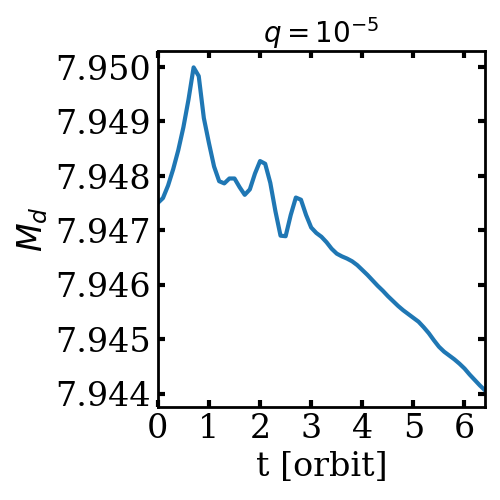

In [172]:
@mpl.rc_context(analytic)
def plot():
    os.chdir("/home/astrosun/jtlaune/athena/work/")
    hst = np.loadtxt("ppd_cyl.hst")
    t=hst[:,0]/6.28
    fig, ax = plt.subplots(figsize=(5,5))
    mass=hst[:,2]
    ax.plot(t, mass)
    ax.set_xlim((0,t[-1]))
    ax.set_xlabel(r"t [orbit]")
    ax.set_ylabel(r"$M_d$")
    ax.set_title("$q=10^{-5}$")
    #ax.axhline(y=-2.35e-8, c="k", ls="--")
    #ax.text(45,-2.3e-8,"$\Gamma_L\propto (q^2/h^2)\Sigma_pr_p^4\Omega_p^2$",
    #        fontsize=20, verticalalignment="bottom")
    fig.tight_layout()
plot()

In [343]:
plt.close('all')

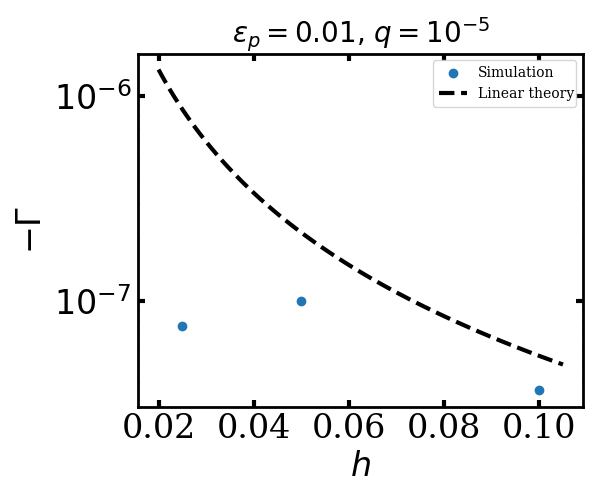

In [63]:
@mpl.rc_context(analytic)
def plot():
    fig, ax = plt.subplots()
    h_sim = np.array([0.025, 0.05, 0.1])
    G_sim = np.array([-7.5e-8, -1e-7, -3.65e-8])
    q = 1e-5
    h = np.linspace(0.02, 0.105,100)
    G = (-0.02-3.578*1.5)*(q/h)**2
    ax.scatter(h_sim, -G_sim, label="Simulation")
    ax.plot(h, -G, "k--", label="Linear theory")
    ax.set_xlabel(r"$h$")
    ax.set_ylabel(r"$-\Gamma$")
    ax.set_yscale("log")
    ax.legend()
    ax.set_title(r"$\epsilon_p=0.01$, $q=10^{-5}$")
    fig.tight_layout()
plot()

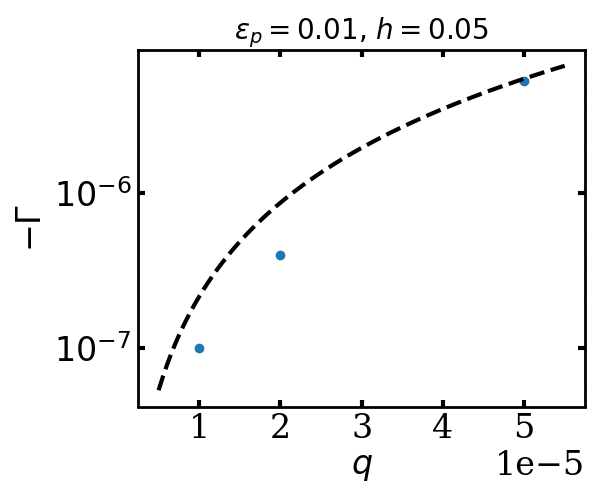

In [101]:
@mpl.rc_context(analytic)
def plot():
    fig, ax = plt.subplots()
    q_sim = np.array([1e-5, 2e-5,5e-5])
    G_sim = np.array([-1e-7, -4e-7, -5.2e-6])
    h = 0.05
    q = np.linspace(0.5e-5,5.5e-5,100)
    G = (-0.02-3.578*1.5)*(q/h)**2
    ax.scatter(q_sim, -G_sim, label="Simulation")
    ax.plot(q,-G,"k--",label="Linear theory")
    ax.set_title(r"$\epsilon_p=0.01$, $h=0.05$")
    ax.set_xlabel(r"$q$")
    ax.set_ylabel(r"$-\Gamma$")
    ax.set_yscale("log")
    fig.tight_layout()
plot()

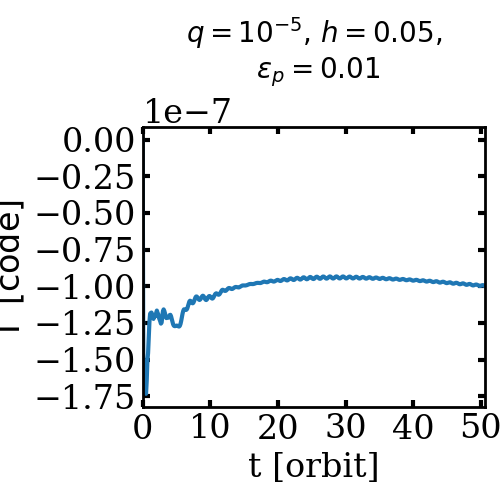

In [83]:
@mpl.rc_context(analytic)
def plot():
    os.chdir("/home/astrosun/jtlaune/athena/work/soft0.01_q1e-5_h0.05/")
    hst = np.loadtxt("ppd_cyl.hst")
    t=hst[:,0]/6.28
    fig, ax = plt.subplots(figsize=(5,5))
    Fsgrav_x=hst[:,9]
    Fsgrav_y=hst[:,10]
    ax.plot(t, -Fsgrav_y)
    ax.set_xlim((0,t[-1]))
    #ax.set_ylim((-3e-7,0.))
    ax.set_xlabel(r"t [orbit]")
    ax.set_title("$q=10^{-5}$, $h=0.05$,\n $\epsilon_p=0.01$", pad=35)
    ax.set_ylabel(r"$\Gamma$ [code]")
    #ax.axhline(y=-4e-7, c="k", ls="--")
    #ax.text(45,-2.3e-8,"$\Gamma_L\propto (q^2/h^2)\Sigma_pr_p^4\Omega_p^2$",
    #        fontsize=20, verticalalignment="bottom")
    fig.tight_layout()
plot()